In [48]:
%matplotlib inline
!mkdir -p data/plots
import jsonlines
import sentencepiece as spm

import pandas as pd
import numpy as np

import plotnine as p9

sp = spm.SentencePieceProcessor()
sp.Load('data/codesearchnet_javascript/csnjs_8k_9995p_unigram_url.model')

True

In [2]:
%%time
data = []
with jsonlines.open('data/codesearchnet_javascript/javascript_train_supervised.jsonl') as f:
    for obj in f:
        data.append(obj)

df = pd.DataFrame(data)
df['func_name_len'] = df['func_name'].str.len()
df['code_len'] = df['code'].str.len()
df['func_name_subword_len'] = df['func_name'].apply(lambda x: len(sp.EncodeAsIds(x)))

CPU times: user 3.33 s, sys: 416 ms, total: 3.75 s
Wall time: 3.96 s


/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: data/plots/identifier_length.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_ecdf : Removed 458 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: data/plots/code_length.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:

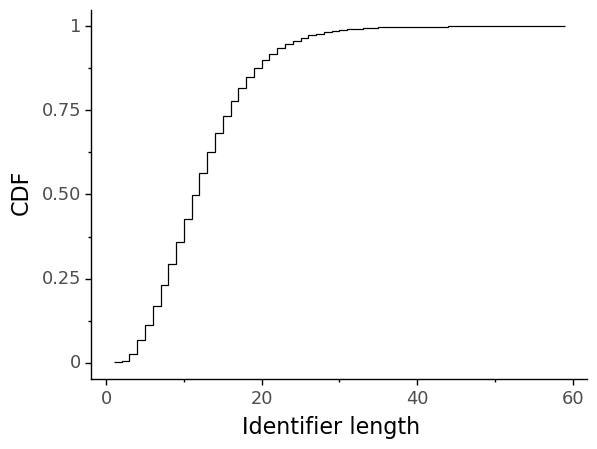

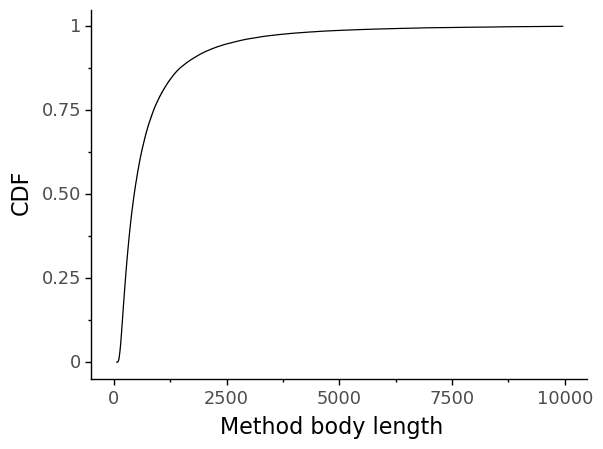

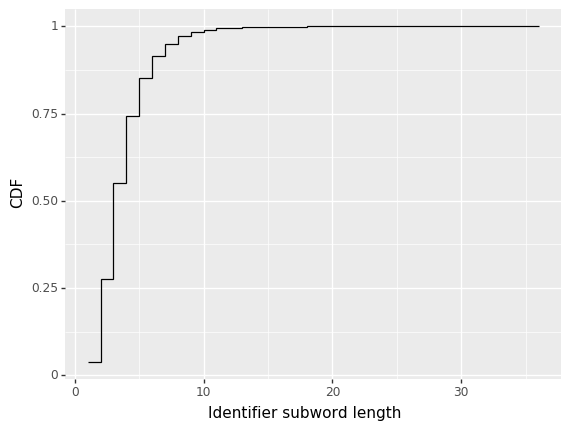

In [65]:
plt_identifier_len = p9.ggplot(
    data=df,
    mapping=p9.aes(x='func_name_len')
) + p9.stat_ecdf() + p9.xlab('Identifier length') + p9.ylab('CDF') + p9.theme_classic(16)
plt_identifier_len.draw()
plt_identifier_len.save('data/plots/identifier_length.pdf')

plt_code_len = p9.ggplot(
    data=df,
    mapping=p9.aes(x='code_len')
) + p9.stat_ecdf() + p9.xlab('Method body length') + p9.ylab('CDF') + p9.theme_classic(16) + p9.xlim(0, 10000)
plt_code_len.draw()
plt_code_len.save('data/plots/code_length.pdf')

n_subwords = p9.ggplot(
    data=df,
    mapping=p9.aes(x='func_name_subword_len')
) + p9.stat_ecdf() + p9.xlab('Identifier subword length') + p9.ylab('CDF')
n_subwords.draw()
n_subwords.save('data/plots/identifier_subword_length.pdf')